In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
df = pd.read_csv('/content/Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [143]:
df.drop('Serial No.', axis=1, inplace=True)

In [144]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [145]:
X=df.drop('Chance of Admit ', axis=1)
y=df['Chance of Admit ']

In [146]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [148]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
93,301,97,2,3.0,3.0,7.88,1
23,334,119,5,5.0,4.5,9.70,1
299,305,112,3,3.0,3.5,8.65,0
13,307,109,3,4.0,3.0,8.00,1
90,318,106,2,4.0,4.0,7.92,1


In [149]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [150]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [151]:
X_train_scaled

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [152]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [153]:
model=Sequential()

In [154]:
model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(4, activation='relu', input_dim=7))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [155]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 4)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93 (372.00 B)

 Trainable params: 93 (372.00 B)

 Non-trainable params: 0 (0.00 B)

In [156]:
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mean_absolute_error'])

In [157]:
history=model.fit(X_train_scaled, y_train.values, epochs=150, validation_split=0.2)

Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3004 - mean_absolute_error: 0.5254 - val_loss: 0.2814 - val_mean_absolute_error: 0.5060
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2388 - mean_absolute_error: 0.4585 - val_loss: 0.2057 - val_mean_absolute_error: 0.4225
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1729 - mean_absolute_error: 0.3756 - val_loss: 0.1298 - val_mean_absolute_error: 0.3232
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1032 - mean_absolute_error: 0.2826 - val_loss: 0.0708 - val_mean_absolute_error: 0.2200
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0638 - mean_absolute_error: 0.2102 - val_loss: 0.0403 - val_mean_absolute_error: 0.1571
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0376 - mean_absolute_error: 0.1574 - val_loss: 0.0319 - val_mean_absolute_error: 0.1488
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0343 - mean_absolute_error: 0.1530 - val_loss: 0.0290 - va

In [158]:
y_pred=model.predict(X_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [159]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)*100

78.8195567636398

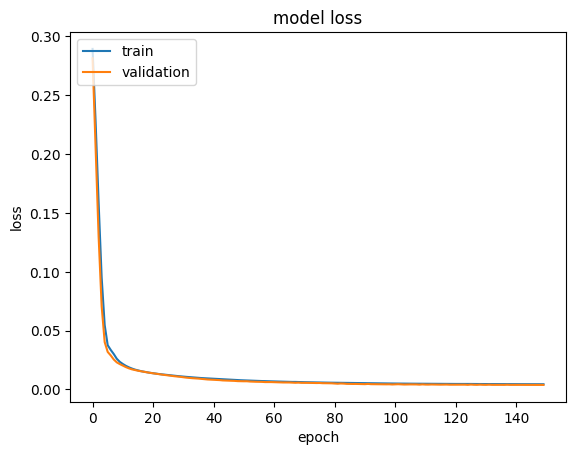

In [160]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

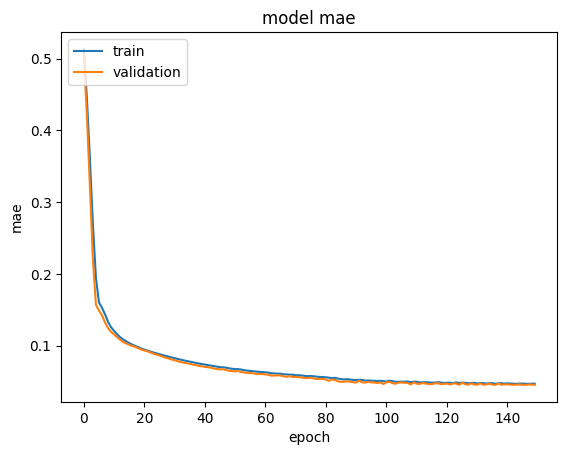

In [161]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')